### In questo notebook creeremo una file .csv che varra salvato e caricato:  
il suddetto file presentera i seguenti dati

1.  _Postazioni_
2.  _Pezzi_
3.  _Data_ 
4.  _Turno_
5.  _Nomi_

### L'azienda in questione si occupa della creazione di tavoli e calcoleremo:

*   _I pezzi lavorati in una settimana_
*   _I tavoli completi creati in una settimana_
*   _Gli andamenti di un singolo operaio_ 
*   _Il confronto tra due operai che svolgono lo stesso ruolo in base ai pezzi prodotti_

### Questo sistema puo essere sviluppato per qualsiasi stabilimento, e porta senza alcuno sforza ad un sistema meritocratico e efficente 

### (Il file al memento finisce qui. Puo essere completato con l'implemento dell IA per calcolare con certezza le previsioni future sugli andamenti e sulla produzione in seguito vi saranno aggiornamenti)

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

### _**PREPARAZIONE FILE CSV**_

In [2]:
df = pd.DataFrame({ 
        "Nome" : ["Rossi", "Franchini", "Giannini", "Berlusconi", "Loddoni", "Loddi", "De Lucia", "Annibaldi", "Guadagno", "Alberti"],
        "Postazione" : ["Piedi", "Assemblaggio", "Verniciatura", "Banco", "Assemblaggio", "Piedi",  "Verniciatura", "Banco", "Banco", "Verniciatura"],
        "Pezzi" : [16, 3, 4, 2, 2, 20, 5, 3, 2, 2]
    
})

df1 = pd.DataFrame({ 
        "Data" : ["01/02/2022"],
        "Turno" : ["06:00 - 14:00"]
})


df_arr = [df , df1]

df2 = pd.concat(df_arr, axis=1)



df2 = df2.fillna(method='ffill')
df2


,Nome,Postazione,Pezzi,Data,Turno
0,Rossi,Piedi,16,01/02/2022,06:00 - 14:00
1,Franchini,Assemblaggio,3,01/02/2022,06:00 - 14:00
2,Giannini,Verniciatura,4,01/02/2022,06:00 - 14:00
3,Berlusconi,Banco,2,01/02/2022,06:00 - 14:00
4,Loddoni,Assemblaggio,2,01/02/2022,06:00 - 14:00
5,Loddi,Piedi,20,01/02/2022,06:00 - 14:00
6,De Lucia,Verniciatura,5,01/02/2022,06:00 - 14:00
7,Annibaldi,Banco,3,01/02/2022,06:00 - 14:00
8,Guadagno,Banco,2,01/02/2022,06:00 - 14:00
9,Alberti,Verniciatura,2,01/02/2022,06:00 - 14:00


In [3]:
df01 = pd.DataFrame({ 
        "Nome" : ["Rossi", "Franchini", "Giannini", "Berlusconi", "Loddoni", "Loddi", "De Lucia", "Annibaldi", "Guadagno", "Alberti"],
        "Postazione" : ["Piedi", "Assemblaggio", "Verniciatura", "Banco", "Assemblaggio", "Piedi",  "Verniciatura", "Banco", "Banco", "Verniciatura"],
        "Pezzi" : [10, 4, 2, 3, 1, 19, 6, 3, 1, 2]
    
})

df_1 = pd.DataFrame({ 
        "Data" : ["01/03/2022"],
        "Turno" : ["06:00 - 14:00"]
})


df_arr1 = [df01 , df_1]

df02 = pd.concat(df_arr1, axis=1)

df02.set_index("Nome")


df02= df02.fillna(method='ffill')
df02

,Nome,Postazione,Pezzi,Data,Turno
0,Rossi,Piedi,10,01/03/2022,06:00 - 14:00
1,Franchini,Assemblaggio,4,01/03/2022,06:00 - 14:00
2,Giannini,Verniciatura,2,01/03/2022,06:00 - 14:00
3,Berlusconi,Banco,3,01/03/2022,06:00 - 14:00
4,Loddoni,Assemblaggio,1,01/03/2022,06:00 - 14:00
5,Loddi,Piedi,19,01/03/2022,06:00 - 14:00
6,De Lucia,Verniciatura,6,01/03/2022,06:00 - 14:00
7,Annibaldi,Banco,3,01/03/2022,06:00 - 14:00
8,Guadagno,Banco,1,01/03/2022,06:00 - 14:00
9,Alberti,Verniciatura,2,01/03/2022,06:00 - 14:00


In [4]:
df01__ = pd.DataFrame({ 
        "Nome" : ["Rossi", "Franchini", "Giannini", "Berlusconi", "Loddoni", "Loddi", "De Lucia", "Annibaldi", "Guadagno", "Alberti"],
        "Postazione" : ["Piedi", "", "Verniciatura", "Banco", "Assemblaggio", "Piedi",  "Verniciatura", "Banco", "Banco", "Verniciatura"],
        "Pezzi" : [13,"" , 5, 2, 2, 17, 6, 3, 3, 2]
    
})

df_1__ = pd.DataFrame({ 
        "Data" : ["01/04/2022"],
        "Turno" : ["06:00 - 14:00"]
})


df_arr1__ = [df01__ , df_1__]

df02__ = pd.concat(df_arr1__, axis=1)

df02__.set_index("Nome")


df02__= df02__.fillna(method='ffill')
df02__

,Nome,Postazione,Pezzi,Data,Turno
0,Rossi,Piedi,13,01/04/2022,06:00 - 14:00
1,Franchini,,,01/04/2022,06:00 - 14:00
2,Giannini,Verniciatura,5,01/04/2022,06:00 - 14:00
3,Berlusconi,Banco,2,01/04/2022,06:00 - 14:00
4,Loddoni,Assemblaggio,2,01/04/2022,06:00 - 14:00
5,Loddi,Piedi,17,01/04/2022,06:00 - 14:00
6,De Lucia,Verniciatura,6,01/04/2022,06:00 - 14:00
7,Annibaldi,Banco,3,01/04/2022,06:00 - 14:00
8,Guadagno,Banco,3,01/04/2022,06:00 - 14:00
9,Alberti,Verniciatura,2,01/04/2022,06:00 - 14:00


In [5]:
df001 = pd.DataFrame({ 
        "Nome" : ["Rossi", "Franchini", "Giannini", "Berlusconi", "Loddoni", "Loddi", "De Lucia", "Annibaldi", "Guadagno", "Alberti"],
        "Postazione" : ["Piedi", "", "Verniciatura", "Banco", "Assemblaggio", "Piedi",  "Verniciatura", "Banco", "Banco", "Verniciatura"],
        "Pezzi" : [6, "", 5, 4, 3, 21, 7, 4, 2, 3]
    
})

df_01 = pd.DataFrame({ 
        "Data" : ["01/05/2022"],
        "Turno" : ["06:00 - 14:00"]
})


df_arr01 = [df001 , df_01]

df002 = pd.concat(df_arr01, axis=1)

df002.set_index("Nome")


df002= df002.fillna(method='ffill')


In [6]:
df_0001 = pd.DataFrame({ 
        "Nome" : ["Rossi", "Franchini", "Giannini", "Berlusconi", "Loddoni", "Loddi", "De Lucia", "Annibaldi", "Guadagno", "Alberti"],
        "Postazione" : ["Piedi", "Assemblaggio", "Verniciatura", "Banco", "Assemblaggio", "Piedi",  "Verniciatura", "Banco", "Banco", "Verniciatura"],
        "Pezzi" : [5, 4, 3, 2, 1, 15, 3, 5, 3, 2]
    
})

df_001_ = pd.DataFrame({ 
        "Data" : ["01/06/2022"],
        "Turno" : ["06:00 - 14:00"]
})


df_arr001 = [df_0001 , df_001_]

df002_ = pd.concat(df_arr001, axis=1)

df002_.set_index("Nome")


df002_= df002_.fillna(method='ffill')
df002_

,Nome,Postazione,Pezzi,Data,Turno
0,Rossi,Piedi,5,01/06/2022,06:00 - 14:00
1,Franchini,Assemblaggio,4,01/06/2022,06:00 - 14:00
2,Giannini,Verniciatura,3,01/06/2022,06:00 - 14:00
3,Berlusconi,Banco,2,01/06/2022,06:00 - 14:00
4,Loddoni,Assemblaggio,1,01/06/2022,06:00 - 14:00
5,Loddi,Piedi,15,01/06/2022,06:00 - 14:00
6,De Lucia,Verniciatura,3,01/06/2022,06:00 - 14:00
7,Annibaldi,Banco,5,01/06/2022,06:00 - 14:00
8,Guadagno,Banco,3,01/06/2022,06:00 - 14:00
9,Alberti,Verniciatura,2,01/06/2022,06:00 - 14:00


In [7]:
Week1 = pd.DataFrame({    
})
at = [df2, df02, df02__, df002, df002_]
Week1 = pd.concat(at, ignore_index=True)
Week1 = Week1.set_index('Nome')
Week1

Week1.to_csv("turno.csv")

### LOAD E APPLICAZIONI FILE CSV

In [8]:
df= pd.read_csv('turno.csv')
df=df.set_index('Nome')
df1111= df.replace(to_replace=np.nan, value="ASSENTE")
df

,Postazione,Pezzi,Data,Turno
Nome,,,,
Rossi,Piedi,16.0,01/02/2022,06:00 - 14:00
Franchini,Assemblaggio,3.0,01/02/2022,06:00 - 14:00
Giannini,Verniciatura,4.0,01/02/2022,06:00 - 14:00
Berlusconi,Banco,2.0,01/02/2022,06:00 - 14:00
Loddoni,Assemblaggio,2.0,01/02/2022,06:00 - 14:00
Loddi,Piedi,20.0,01/02/2022,06:00 - 14:00
De Lucia,Verniciatura,5.0,01/02/2022,06:00 - 14:00
Annibaldi,Banco,3.0,01/02/2022,06:00 - 14:00
Guadagno,Banco,2.0,01/02/2022,06:00 - 14:00


### _**QUI ABBIAMO COME ESEMPIO IL SIGN. BERLUSCONI E TRAMITE QUESTO GRAFICO POSSIAMO VEDERE LA SUA PRODUZIONE SETTIMANALE**_  
_**E ANCHE QUELLA DI QUALUNQUE ALTRO ELEMENTO PRESENTE NEL TURNO**_

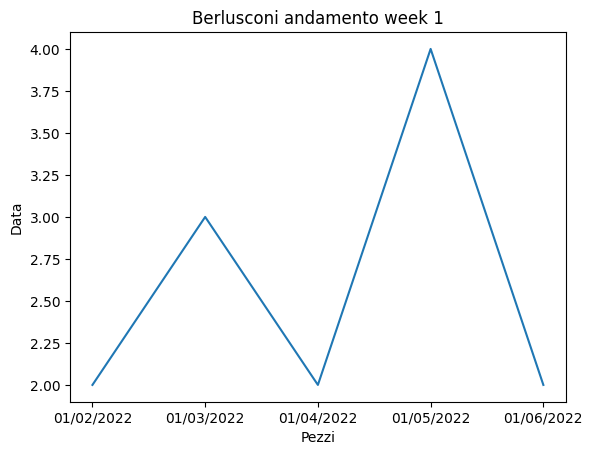

In [9]:

df_Berlusconi= df1111.loc['Berlusconi']
Andamento_Berl = df_Berlusconi.set_index('Data')['Pezzi']
Berl = Andamento_Berl
Berl=Berl.reset_index()
Berl_1= Berl.set_index('Pezzi')

sns.lineplot(x=Berl['Data'], y=Berl['Pezzi'],data=Berl)
plt.title('Berlusconi andamento week 1')
plt.xlabel('Pezzi')
plt.ylabel('Data')
plt.show()

### **QUI ABBIAMO UN PARAGONE:**  
**NELLA PRIMA SETTIMANA DI GENNAIO ANNO LAVORATO AI PIEDI IL SING. LODDI E IL SIGN.ROSSI**  
**COME POSSIAMO BEN NOTARE DAL GRAFICO LODDI HA MONTATO IL 64.79% DEI PIEDI MONTATI DURANTE LA SETTIMANA**  
_(IL SIGNOR LODDI E' DA PREMIARE)!_

In [10]:
df1=df1111.groupby('Postazione').get_group('Piedi')
df11= df1.groupby(['Nome','Postazione'])['Pezzi'].sum()
df11

Nome   Postazione
Loddi  Piedi         92.0
Rossi  Piedi         50.0
Name: Pezzi, dtype: object

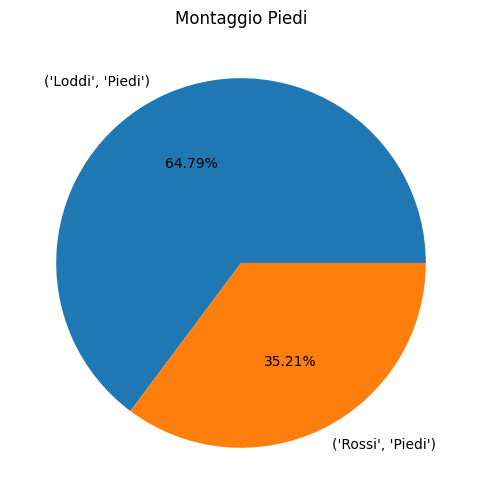

In [11]:
df1 = df1['Pezzi'].astype(int)
plt.figure(figsize=(12,6))
plt.title("Montaggio Piedi")
g = plt.pie(df11,
            labels=df11.index,
            autopct="%1.2f%%")
plt.show()



In [12]:
df2 = df.groupby(['Nome','Postazione'])['Pezzi'].sum()
df2 = df2.reset_index()
df2 = df2.set_index('Postazione')
df3 = df2.groupby('Postazione')['Pezzi'].sum()
df3

Postazione
Assemblaggio     20.0
Banco            42.0
Piedi           142.0
Verniciatura     57.0
Name: Pezzi, dtype: float64

### _**In questa pagina definiamo quanti pezzi sono stati fatti durante la settimana e quanti tavoli completi sono stati realizzati**_

In [72]:
tavoli_comp = pd.DataFrame({
    'tavoli_comp': [0]
})
df4 = pd.concat([df3, tavoli_comp], axis=1)
df5 = df4.replace(to_replace=np.nan, value= "" )
df5 = df5.reindex(index=['Assemblaggio','Banco','Piedi', 'Verniciatura', 'tavoli_comp'])
df5 = df5.reindex(columns=['Pezzi'])
df5 = df5.replace(to_replace=np.nan, value= 0 )
df5 = df5.astype(int)



Assemblaggio = str(int(df5.loc['Assemblaggio']['Pezzi']))
Banco = str(int(df5.loc['Banco']['Pezzi']))
Piedi = str(int(df5.loc['Piedi']['Pezzi']))
Verniciatura = str(int(df5.loc['Verniciatura']['Pezzi']))
tavoli_comp = str(int(df5.loc['tavoli_comp']['Pezzi']))

class tavolo_finito():
    def __init__(self, a, b, c, d, e):
        self.a = int(a)
        self.b = int(b)
        self.c = int(c)
        self.d = int(d)
        self.e = int(e)
    
                
    def Calcolo_banco_Assemblaggio(self):
        x = 0
        y = 0
        f = 0
        w = 0
        ww = 0
        wa = 0
        wb = 0
        wc = 0
        w1 = 0

        while (self.a - 1) >= 0:
            self.a = self.a - 3
            x = x + 1
        print("\nAbbiamo assemblato per {} tavoli".format(x))

        while (self.b - 1) >= 0:
            self.b = self.b - 1
            y = y + 1
        print("\nAbbiamo banchi per {} tavoli".format(y))

        while (self.c - 4) >= 0:
            self.c = self.c - 4
            f = f + 1
        print("\nAbbiamo piedi per {} tavoli".format(f))
        print("sono stati fatti {} piedi in piu".format(self.c))

        while (self.d - 1) >= 0:
            self.d = self.d - 4
            w = w + 1
        print("\nAbbiamo verniciato per {} tavoli".format(w))

        while x > 0:
            x = x - 1
            ww = ww + 1
            while y > 0:
                y = y - 1
                wa = wa + 1
                while f > 0:
                    f = f - 1
                    wb = wb + 1
                    while w > 0:
                        w = w -1
                        wc = wc + 1
      
        
        if ww < wa and ww < wb and ww < wc:
            w1 = ww
        if wa < ww and wa < wb and wa < wc:
            w1 = wa
        if wb < wa and wb < ww and wb < wc:
            w1 = wb
        if wc < wa and wc < wb and wc < ww:
            w1 = wc
        
        print("\nSono stati fatti {} tavoli completi".format(w1))
            
            
    
        
tavolo = tavolo_finito(Assemblaggio, Banco, Piedi, Verniciatura, tavoli_comp)
tavolo.Calcolo_banco_Assemblaggio()





Abbiamo assemblato per 7 tavoli

Abbiamo banchi per 42 tavoli

Abbiamo piedi per 35 tavoli
sono stati fatti 2 piedi in piu

Abbiamo verniciato per 15 tavoli

Sono stati fatti 7 tavoli completi
